<a href="https://colab.research.google.com/github/Kirtanaaa/ML_Classification/blob/main/kernelsvmm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines (SVM)

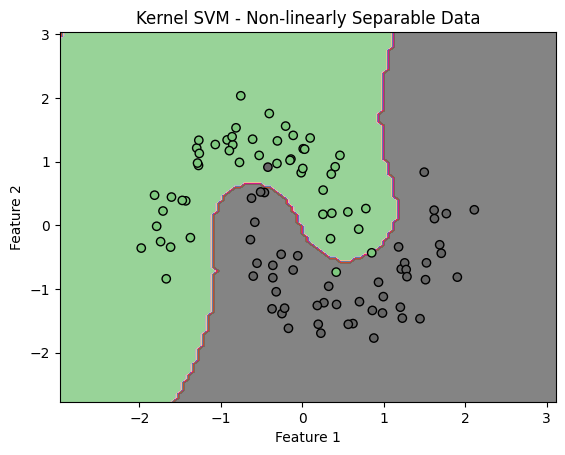

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Generate non-linearly separable "moons" dataset
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create a Kernel SVM model with the RBF (Gaussian) kernel
model = SVC(kernel='rbf', gamma=1.0)

# Fit the model to the data
model.fit(X, y)

# Create a meshgrid to visualize the decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the data points and decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Accent)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Accent, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Kernel SVM - Non-linearly Separable Data')
plt.show()


When you run this code, it will display a plot showing the data points as two interleaving half circles (moons) of different colors. The decision boundary is a smooth curve, illustrating how Kernel SVM can handle non-linearly separable data effectively by transforming the features into a higher-dimensional space using the Gaussian (RBF) kernel.

# INTRO

1. Regular (Linear) SVM:

Imagine you have data points with two features, and you want to draw a straight line to separate them into two classes. If the data points are well-behaved and can be separated by a line, a regular SVM works fine.

2. Non-Linear Data:

Now, consider a more complicated scenario where the data points cannot be separated by a straight line. For example, the data might be scattered in a circular pattern, and a straight line won't be able to separate the two classes effectively.

3. Kernel Trick:

Kernel SVM uses a clever trick to handle non-linear data. Instead of changing the original data, it "transforms" the data points into a higher-dimensional space where they might become separable. This transformation is done using a special mathematical function called a "kernel."

4. Separating in Higher Dimensions:

After transforming the data, it tries to find a hyperplane (a higher-dimensional equivalent of a line) that can effectively separate the data points of different classes.
Popular Kernels: There are different types of kernels used in Kernel SVM, such as polynomial and Gaussian (RBF) kernels.

Each kernel transforms the data in a specific way to make it separable.
Flexibility: Kernel SVM is more flexible and can handle various shapes of data distributions, making it suitable for complex real-world problems.

5. Applications: Kernel SVM is used in various tasks like image recognition, text classification, predicting diseases based on medical data, and more.

In essence, Kernel SVM is an extension of regular SVM that allows you to handle more complex data patterns by transforming the data into a higher-dimensional space using special mathematical functions called kernels. It is a powerful tool that can effectively classify data that cannot be separated by a simple line.

# Types of Kernal SVM

In Support Vector Machines (SVM), various types of kernels are used to transform data into a higher-dimensional space, allowing the classification of non-linearly separable data.

The choice of kernel depends on the nature of the data and the problem at hand. Some of the commonly used kernels in SVM are:

1. Linear Kernel:

- The simplest and default kernel for SVM.

- It performs linear classification in the original feature space.

- Suitable for linearly separable data.

2. Polynomial Kernel:

- Transforms data into a higher-dimensional polynomial space.

- It introduces non-linearity, making it suitable for moderately non-linear data.

- The degree of the polynomial is a hyperparameter that determines the complexity of the transformation.

3. Radial Basis Function (RBF) Kernel:

- Also known as the Gaussian Kernel.
Maps data into an infinite-dimensional space.

- It can capture complex and highly non-linear data distributions.

- Has two hyperparameters: gamma (controls the width of the Gaussian) and C (controls the regularization).

4. Sigmoid Kernel:

- Transforms data using a sigmoid function.

- Originally used for binary classification, but less common than other kernels.

- Can be used for non-linear data, but may not perform as well as the
RBF kernel.

5. Custom Kernels:

- SVM allows the use of custom kernels, which can be defined based on the specific problem's requirements.

- Custom kernels are useful when the data has a unique structure that cannot be handled by standard kernels.

Choosing the right kernel is essential for achieving good performance in SVM.

Linear kernel is generally used for linearly separable data, while RBF kernel is popular for handling complex and non-linear data distributions.

The polynomial kernel can be useful for data that exhibits moderate non-linearity.

It's important to note that the performance of SVM is sensitive to the choice of kernel and its hyperparameters.

The selection of the appropriate kernel and tuning of hyperparameters often involve experimentation and cross-validation to find the best combination that leads to a well-performing model for the specific problem.

## Importing libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing dataset

In [21]:
dataset = pd.read_csv('insta.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Splitting the dataset into Training & Test set

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=21)

## Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Kernal SVM Training on Training set

In [24]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=42)
classifier.fit(x_train,y_train)

SVC(random_state=42)

## Predicting

In [25]:
print(classifier.predict(sc.transform([[36,28000]])))

[1]


## Predicting Test set results

In [26]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]]


## Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_pred,y_test)
print(cm)
accuracy_score(y_pred,y_test)

[[34  3]
 [ 3 20]]


0.9

## Visualizing Test Set results

<ipython-input-28-6f3b5ec5477b>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


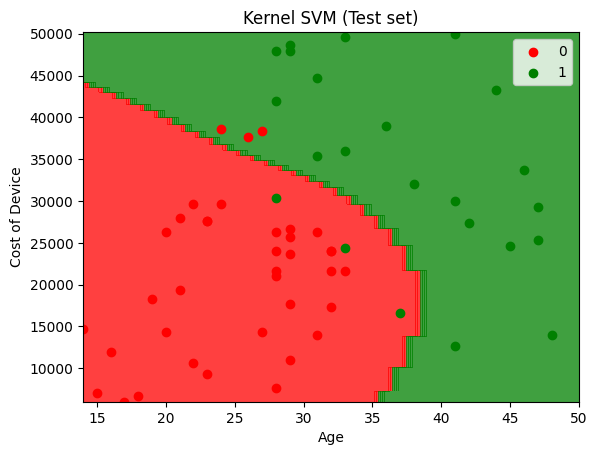

In [28]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0, stop = X_set[:, 0].max() + 3, step = 1),
                     np.arange(start = X_set[:, 1].min() - 0, stop = X_set[:, 1].max() + 200, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Cost of Device')
plt.legend()
plt.show()

## Visualising Training set results

<ipython-input-29-8b4a6a2945c2>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


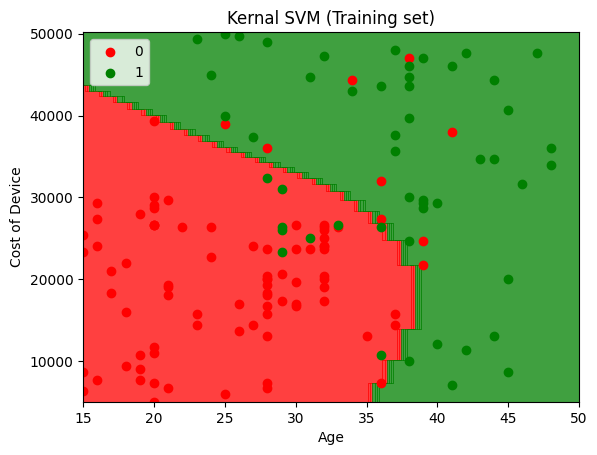

In [29]:
from matplotlib.colors import ListedColormap
x_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 0, stop = x_set[:, 0].max() + 3, step = 1),
                     np.arange(start = x_set[:, 1].min() - 0, stop = x_set[:, 1].max() + 200, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernal SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Cost of Device')
plt.legend()
plt.show()